# Rear Tire Cornering Analysis
## R25B 18.0 x 7.5-10 on 7" Rim
### Comparing Different Influences on Tire Load Outputs

In [1]:
import scipy.io as sio
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np
import copy

import sys
sys.path.append("../")
import data_helpers

### Import tire data & Show distribution of samples on variable sweeps

In [10]:
df = data_helpers.import_data(sio.loadmat("../tire_data/processed_data/cornering_2021_rears.mat"))

print(df)

variable_sweeps = {"load" : {"sweep" : np.array([-250, -200, -150, -100, -50]) / 0.224809, "label" : "FZ" },
                    "camber" : {"sweep" : np.array([0, 2, 4]), "label" : "IA"},
                    "pressure" : {"sweep" : np.array([8, 10, 12, 14]) * 6.89476, "label" : "P"},
                    "velocity" : {"sweep" : np.array([15, 25, 45]) * 1.60934, "label" : "V"}}

for variable, info in variable_sweeps.items():
    count = df.groupby([variable])[variable].count()
    variable_sweeps[variable]["count"] = count
    print(count, "\n")

      ET      V       N     SA     IA      RL      RE      P      FX      FY  \
0  267.6  40.34  479.89  0.052 -0.031  21.646  22.301  83.33 -41.533 -14.824   

        FZ    MX    MZ   NFX   NFY    RST   TSTI   TSTC   TSTO  AMBTMP     SR  \
0 -555.085 -7.58 -8.11  0.07 -0.02  29.86  49.21  46.91  49.37   27.39 -0.029   

    SL  RUN         load  camber  pressure  velocity  
0 -0.0   21 -1112.055122       0  82.73712   40.2335  
load
-1112.055122    1
Name: load, dtype: int64 

camber
0    1
Name: camber, dtype: int64 

pressure
82.73712    1
Name: pressure, dtype: int64 

velocity
40.2335    1
Name: velocity, dtype: int64 



### Comparing lateral force and self aligning moment against slip angle for different pressures. Holds camber, velocity, and load constant by choosing most commonly used value.

In [3]:
temp_df = copy.copy(df)
for variable, info in variable_sweeps.items():
    if variable != "pressure":
        temp_df = temp_df[temp_df[variable] == info["count"].idxmax()]

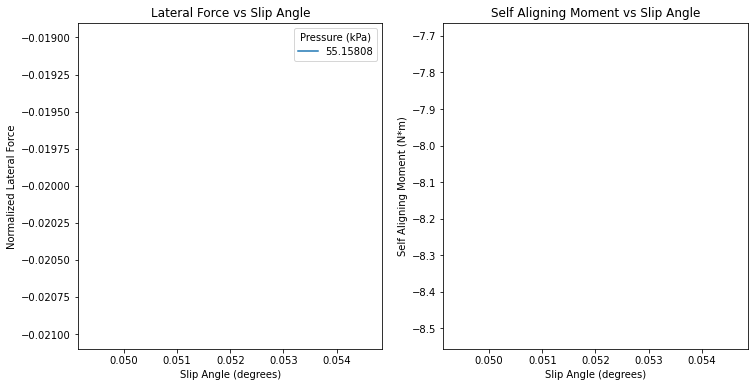

In [4]:
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)

for i, g in temp_df.groupby(["pressure"]):
    plt.plot(g["SA"], g["NFY"])
plt.legend(variable_sweeps["pressure"]["sweep"], title = "Pressure (kPa)")
plt.title("Lateral Force vs Slip Angle")
plt.xlabel("Slip Angle (degrees)")
plt.ylabel("Normalized Lateral Force")

plt.subplot(1, 2, 2)
for i, g in temp_df.groupby(["pressure"]):
    plt.plot(g["SA"], g["MZ"])
plt.title("Self Aligning Moment vs Slip Angle")
plt.xlabel("Slip Angle (degrees)")
plt.ylabel("Self Aligning Moment (N*m)")

plt.show()

Based on this graph, it is clear the 82.74 kPa (12 psi) pressure is optimal for the tire because it maximizes lateral force

### Comparing lateral force and self aligning moment against slip angle for different cambers. Holds pressure, velocity, and load constant by choosing most commonly used value.

In [5]:
temp_df = copy.copy(df)
for variable, info in variable_sweeps.items():
    if variable != "camber":
        temp_df = temp_df[temp_df[variable] == info["count"].idxmax()]

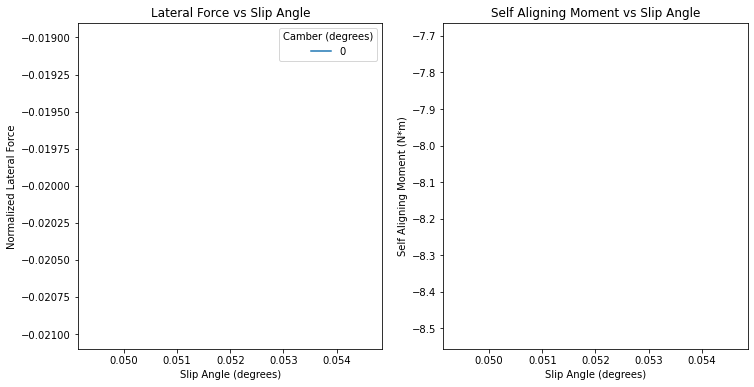

In [6]:
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)

for i, g in temp_df.groupby(["camber"]):
    plt.plot(g["SA"], g["NFY"])
plt.legend(variable_sweeps["camber"]["sweep"], title = "Camber (degrees)")
plt.title("Lateral Force vs Slip Angle")
plt.xlabel("Slip Angle (degrees)")
plt.ylabel("Normalized Lateral Force")

plt.subplot(1, 2, 2)
for i, g in temp_df.groupby(["camber"]):
    plt.plot(g["SA"], g["MZ"])
plt.title("Self Aligning Moment vs Slip Angle")
plt.xlabel("Slip Angle (degrees)")
plt.ylabel("Self Aligning Moment (N*m)")

plt.show()

Based on this graph, the closer the camber is to zero, the more optimal for the tire because it maximizes lateral force

### Comparing lateral force and self aligning moment against slip angle for different velocities. Holds pressure, camber, and load constant by choosing most commonly used value.

In [7]:
temp_df = copy.copy(df)
for variable, info in variable_sweeps.items():
    if variable != "velocity":
        temp_df = temp_df[temp_df[variable] == info["count"].idxmax()]

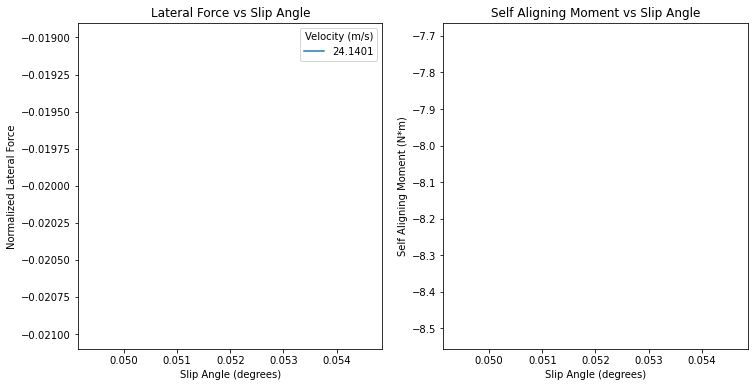

In [8]:
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)

for i, g in temp_df.groupby(["velocity"]):
    plt.plot(g["SA"], g["NFY"])
plt.legend(variable_sweeps["velocity"]["sweep"], title = "Velocity (m/s)")
plt.title("Lateral Force vs Slip Angle")
plt.xlabel("Slip Angle (degrees)")
plt.ylabel("Normalized Lateral Force")

plt.subplot(1, 2, 2)
for i, g in temp_df.groupby(["velocity"]):
    plt.plot(g["SA"], g["MZ"])
plt.title("Self Aligning Moment vs Slip Angle")
plt.xlabel("Slip Angle (degrees)")
plt.ylabel("Self Aligning Moment (N*m)")

plt.show()

In [9]:
pd.set_option('display.max_columns', None)
for i, g in temp_df.groupby(["velocity"]):
    h = g[(g["SA"] > 9.98) & (g["SA"] <= 10)]
    print(h.head(), "\n")   

Empty DataFrame
Columns: [ET, V, N, SA, IA, RL, RE, P, FX, FY, FZ, MX, MZ, NFX, NFY, RST, TSTI, TSTC, TSTO, AMBTMP, SR, SL, RUN, load, camber, pressure, velocity]
Index: [] 

